### Analyze the Performance

In [ ]:
gtruth=pd.DataFrame(columns=[f"Class {i}" for i in set(sessions_dataset['day'])], index=set(sessions_dataset['identity']))
gtruth=gtruth.fillna(0)
for instance in sessions_dataset['id']:
  gtruth.iloc[sessions_dataset['identity'][instance], sessions_dataset['day'][instance]] += 1
gtruth[gtruth>=1] = 1

pred_df=pd.DataFrame(columns=[f"Class {i}" for i in set(sessions_dataset['day'])], index=set(sessions_dataset['identity']))
pred_df=pred_df.fillna(0)
probs_df = pred_df.copy()

In [ ]:
for day in set(sessions_dataset['day']):
  day_embeddings = []
  for instance in sessions_dataset['id']:
    instance_day = sessions_dataset['day'][instance]
    if instance_day != day:
      continue
    photo_path = f"{QUERY_IMGS_PATH}/Q{instance:04d}.png"
    query_embed = get_embedding(photo_path)
    day_embeddings.append(query_embed)
  for id, enroll_embeddings in embeddings_complemented.items():
    dists = []
    for enroll_embed in enroll_embeddings:
      for embed in day_embeddings:
        dists.append(l2_distance(enroll_embed, embed).detach().numpy().item())
    probs_df.iloc[id, day] = min(dists)
  print(f"Day: {day} Processed")

Day: 0 Processed
Day: 1 Processed
Day: 2 Processed
Day: 3 Processed
Day: 4 Processed
Day: 5 Processed
Day: 6 Processed
Day: 7 Processed
Day: 8 Processed
Day: 9 Processed
Day: 10 Processed
Day: 11 Processed
Day: 12 Processed
Day: 13 Processed
Day: 14 Processed
Day: 15 Processed
Day: 16 Processed
Day: 17 Processed
Day: 18 Processed
Day: 19 Processed
Day: 20 Processed
Day: 21 Processed
Day: 22 Processed
Day: 23 Processed
Day: 24 Processed


In [ ]:
predictions_df = (probs_df<THRESHOLD).astype(int)

#### Ground Truth vs Predicted Attendance Matrix

In [ ]:
# Ground Truth
gtruth

,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 15,Class 16,Class 17,Class 18,Class 19,Class 20,Class 21,Class 22,Class 23,Class 24
0,0,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,0,1,1,1,1
4,1,1,1,1,1,1,1,1,1,0,...,0,1,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,1,0,1,0,0,1,1,1,0,...,1,1,1,0,1,1,0,1,0,1
63,1,0,1,0,1,1,0,1,1,1,...,1,1,0,1,1,1,1,0,1,1
64,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,1,1,1,0,1,1,0,1,0,1,...,1,1,1,0,1,1,1,1,1,1


In [ ]:
# Predictions
predictions_df

,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 15,Class 16,Class 17,Class 18,Class 19,Class 20,Class 21,Class 22,Class 23,Class 24
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,0,1,1,1,1,...,1,1,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
63,1,0,1,0,1,1,0,1,1,1,...,1,1,0,1,1,1,1,0,1,1
64,1,1,1,1,0,0,1,1,1,0,...,1,1,1,1,1,0,0,0,0,1
65,1,1,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,1,1,1


#### Accuracy, Precision, and Recall

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
print(f"Accuracy: {accuracy_score(gtruth.to_numpy().flatten().astype(int), predictions_df.to_numpy().flatten().astype(int)):.2f}")
print(f"Recall: {recall_score(gtruth.to_numpy().flatten().astype(int), predictions_df.to_numpy().flatten().astype(int)):.2f}")
print(f"Precision: {precision_score(gtruth.to_numpy().flatten().astype(int), predictions_df.to_numpy().flatten().astype(int)):.2f}")

Accuracy: 0.83
Recall: 0.91
Precision: 0.87


#### ROC Curve

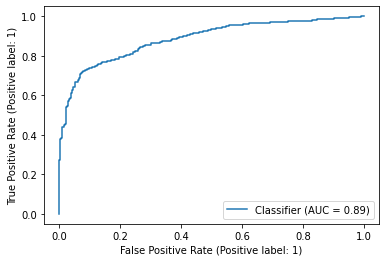

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(gtruth.to_numpy().flatten().astype(int), -probs_df.to_numpy().flatten().astype(float))

## Discussion
* We can see that our trained model on face images with and without masks was able to achieve reasonably good performance on the test data and on the application in hand of attendance classification on an annotated classroom dataset of different sessions of the same class containing the same enrolled students. as shown in the image below containing a slice of correct predictions made by the model.
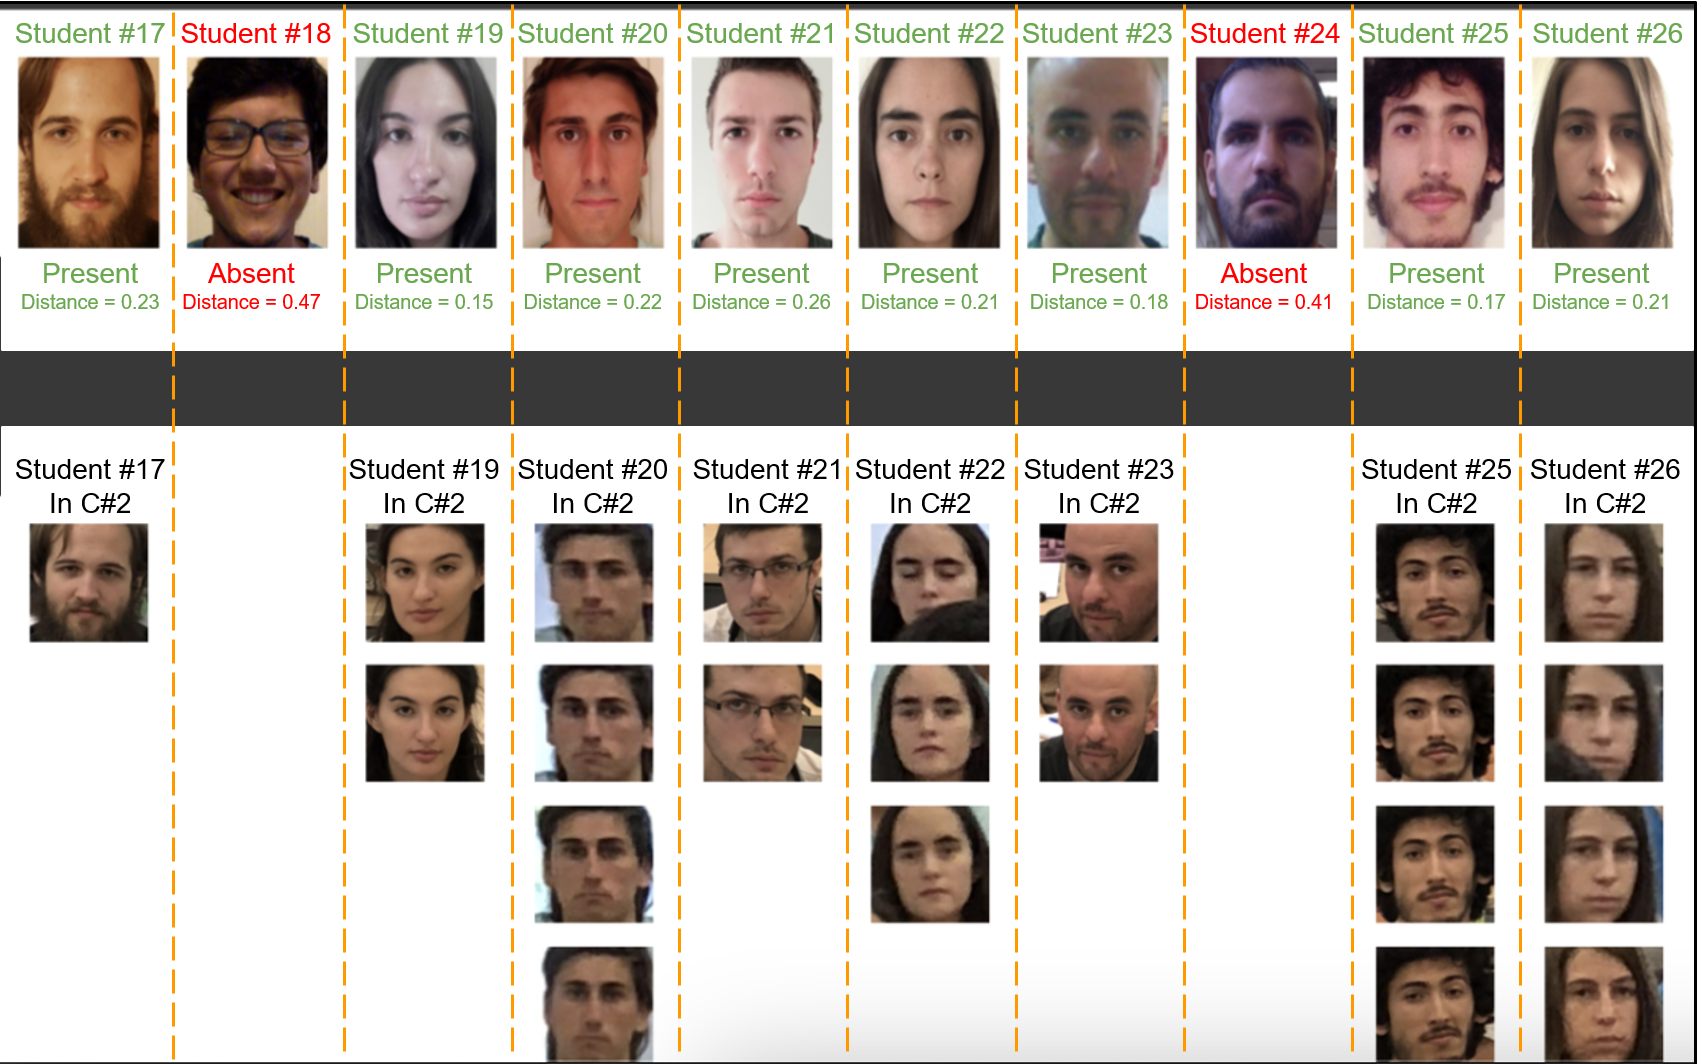
* It was seen that although the model can generally generalize well, there are a number of examples that it misclassififed. By investigating the trends of misclassification, it could be seen that the faces not attending the first class (where the database has only one of their faces and not more) are more likely to be misclassified in the future classes. A good solution to that is to complement the database with photos from multiple classes and not only the very first one. Another pattern that was observed is that some people look completely different in some future classes (e.g. not wearing glasses, no beard, etc..) and although some of these examples are classified correctly, some are not and it was seen to be even challening for a typical human to classify. the first suggested solution is likely to help alleviate this problem as well.
* Although our best model has been trained for tens of hours, due to the large size of the dataset and the small batch size (due to GPU limitations) requiring a small batch size to avoid instability, the model performance is likely to even improve further as we continue to train it for more hours, which will expose it to more examples from the training set.
* Some of the major project challenges included requiring lots of GPU memory, storage, and computational wall time due to the massive datasets used and needed to learn useful facial recognition patterns, which is generally the trend in deep learning
* The trade-off between false positives and false negatives is improtant for the application in hand due to the different outcomes of each (e.g. false negatives are very tolerable in our application, unlike in the case of an access control admitatnce system which could lead to severely detrimental consequences)
* The low resolution of faces, especially for students sitting in the back of the classroom was seen to be a major problem making cropping these faces and correclty classifying them more challening. A solution to that would be take classroom photos from different positions in the class and not necessarily from the front only. Different methods for face detection and cropping could also be investigated in the future.
* Accelerating training process by feeding the model hard negatives to improve classification was important. correctly. In this problem there is almost an infinite number of triplets that can be selected, so we try to train the model with hard negatives to save time.
* There are multiple ethical dilemmas and considerations that related to this project as it challenging to source data of individuals of multiple backgrounds, leading to a risk of test data having a high bias (e.g. all non-coloured individuals in a specific region). There is also a privacy concern, requires videographic consent to store data needed to execute the model training as well as on the application scenario.







## References

*   https://github.com/aqeelanwar/MaskTheFace
*   http://vis-www.cs.umass.edu/lfw/
*   https://github.com/mackenney/attendance-system-wacv19/tree/master/DB/class_photos
*   http://dmery.sitios.ing.uc.cl/Prints/Conferences/International/2019-WACV.pdf
*   https://deeplearning.neuromatch.io/tutorials/W2D3_ModernConvnets/student/W2D3_Tutorial2.html
* https://github.com/timesler/facenet-pytorch/blob/master/examples/finetune.ipynb
* https://github.com/davidsandberg/facenet/blob/master/src/train_tripletloss.py
* https://github.com/tamerthamoqa/facenet-pytorch-glint360k/blob/0ab37d3cc2ecc871064f99334b812830fb2bcae2/train_triplet_loss.py
* https://github.com/hengyi/LFW-pairs-create/blob/master/create_eval_pairs.py

